# Linear Regression

## Y = wX + b
where:

Y ---> Dependent Variable

X ---> Independent Variable

w ---> Weight

b ---> Bias

## Gradient Descent:
- **Gradient descent** is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.




## Learning Rate
- The **learning rate** is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward the minimum of a loss function.

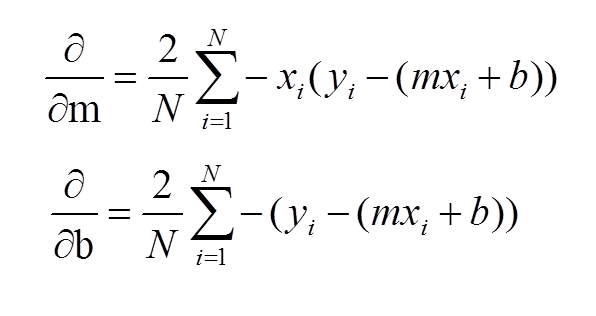

In [1]:
#Import the require Library 
import numpy as np

### Linear Regression

In [48]:
class Linear_Regression():
    
 #Initiating the parameters (learning rate and number of iterations)    

    def __init__ (self, learning_rate, no_of_iterations):
        
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
    
    def fit(self, X, Y):
        
        # No. of training examples and number of features
        
        self.m, self.n = X.shape  #Number of rows and columns
        
        # Initiating the weight and bias
        
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # Implementing gradient descent
        
        for i in range(self.no_of_iterations):
            self.update_weights()
        
        
    
    def update_weights(self, ):
        
        Y_prediction = self.predict(self.X)
        
    # Calculate the gradients
    
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    
        db = - (2 * np.sum((self.Y - Y_prediction))) / self.m
    
    # Updating the weights
        
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
        
    def predict(self, X):
        
        return X.dot(self.w) + self.b
        

## Implementing the linear regression

In [2]:
#Import the necessary dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
#Import the dataset into pandas dataframe
salary_data = pd.read_csv(r"C:\Users\SiyaB\Desktop\AI & ML\Module 7\Linear Regression\salary_data.csv")
salary_data.shape

(30, 2)

In [4]:
#Load the first 5 rows of the data
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [57]:
#Load the last 5 rows of the data
salary_data.tail()

In [58]:
#Check for missing values
salary_data.isnull().sum()

In [42]:
#Separating the data into feature and target variables
X = salary_data[['YearsExperience']]
Y = salary_data['Salary'].values
print(X.shape)

(30, 1)


In [39]:
X = salary_data.iloc[: , :-1].values
Y = salary_data.iloc[:, 1].values
print(X.shape)

(30, 1)


In [43]:
#Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)  

In [49]:
#Training the linear regression model 
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)
model

In [50]:
#Fit the linear regression model with the training data
model.fit(X_train, Y_train)


In [54]:
#Print the parameter values
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9534.934692142133
bias =  23735.97251425514


**The Linear regression equation:**

y = 9534X + 23735

salary = 9534(experience) + 23735

In [55]:
#Predicting the salary values for test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

1      36131.387614
0      34224.400676
14     66643.178629
9      59015.230875
21     91434.008828
19     80945.580667
23    101922.436990
6      52340.776591
3      42805.841899
dtype: float64


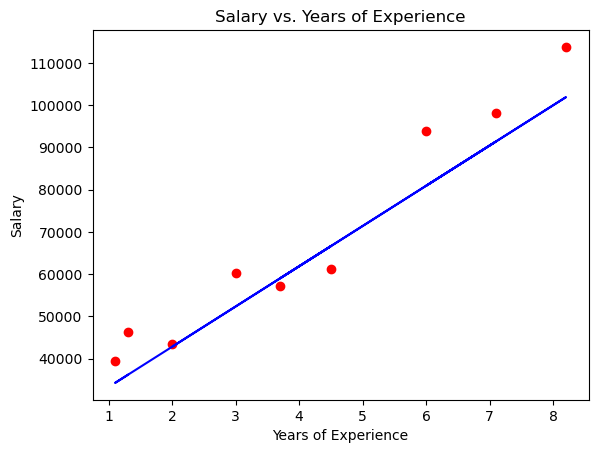

In [56]:
#Visualizing the predicted values vs the actual values
plt.scatter(X_test, Y_test, color = 'r')
plt.plot(X_test, test_data_prediction, color = 'b')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.show()